# Homework 4

In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set(style="whitegrid")
warnings.filterwarnings("ignore", category=FutureWarning)  # Optional: suppress warnings


### Preparing the dataset

In [20]:
# Define the dataset path
dataset_path = '../../datasets/accounts.csv'

# Load the dataset
df = pd.read_csv(dataset_path)

# Select the first 8 features
df_selected = df.iloc[:, :8]

# Remove duplicates
df_selected = df_selected.drop_duplicates()

# Remove null values
df_selected = df_selected.dropna()

df_selected

,age,job,marital,education,default,balance,housing,loan
0,59,admin.,married,secondary,no,2343,yes,no
1,56,admin.,married,secondary,no,45,no,no
2,41,technician,married,secondary,no,1270,yes,no
3,55,services,married,secondary,no,2476,yes,no
4,54,admin.,married,tertiary,no,184,no,no
...,...,...,...,...,...,...,...,...
11156,34,blue-collar,single,secondary,no,-72,yes,no
11157,33,blue-collar,single,primary,no,1,yes,no
11158,39,services,married,secondary,no,733,no,no
11159,32,technician,single,secondary,no,29,no,no


### Data preprocessing
We have categorical data that needs to be converted to numerical, so we can apply MinMaxScaler and StandardScaler.

In [21]:
# Columns to be encoded with one-hot encoding
one_hot_columns = ['job', 'marital', 'education', 'housing', 'loan']

# Columns to be encoded with binary encoding
binary_ordinal_columns = ['default', 'housing', 'loan']

# Columns to be encoded with ordinal encoding
ordinal_columns = ['education']



# Define the preprocessing steps for each type of column
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), one_hot_columns),
        ('binary', OrdinalEncoder(), binary_ordinal_columns),
        ('ordinal', OrdinalEncoder(), ordinal_columns)
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

# Create a pipeline that first preprocesses the data and then scales it
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', MinMaxScaler())
])

# Fit and transform the data
df_preprocessed = pipeline.fit_transform(df_selected)

# Print the preprocessed data
df_preprocessed.shape

(10316, 29)

### Exercise 1

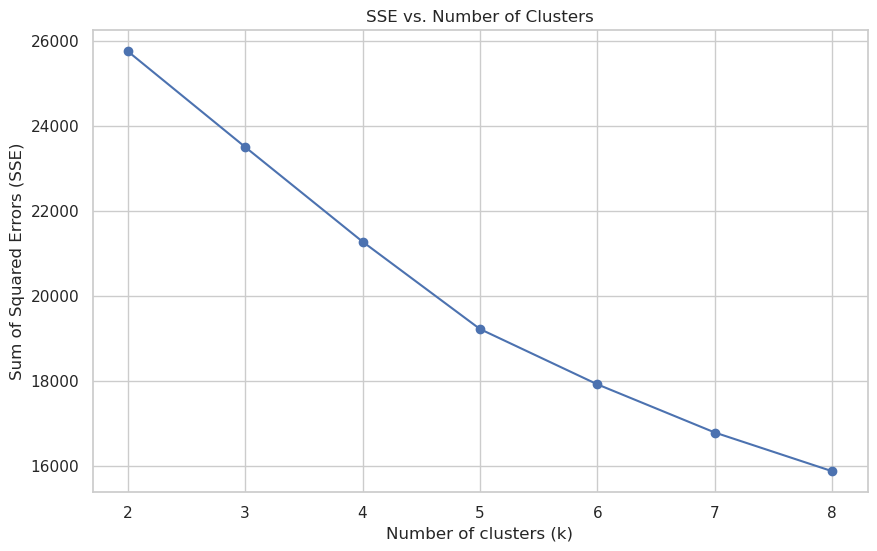

In [22]:
# Normalize the data
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_preprocessed)

# Apply K-means clustering with different values of k
sse = []
k_values = range(2, 9)
for k in k_values:
    kmeans = KMeans(n_clusters=k, max_iter=500, random_state=42)
    kmeans.fit(df_normalized)
    sse.append(kmeans.inertia_)

# Plot the SSE for each value of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('SSE vs. Number of Clusters')
plt.grid(True)  # Add grid for better readability
plt.show()